In [ ]:
!pip install micromlgen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for micromlgen: filename=micromlgen-1.1.28-py3-none-any.whl size=32172 sha256=dcc2a7522ed942f32b626b9f417e853ac26c5f2aed2b7c4a176f640f6425d363
  Stored in directory: /root/.cache/pip/wheels/6f/98/43/0860b692737af546b9262a8b60ec3690c8bdc51c25e545ae09
Successfully built micromlgen


In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from micromlgen import port

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/stress level - heart rate/dataset.csv')
df.head()

,Kelas,HR
0,H,101.37
1,H,105.30
2,H,102.34
3,H,81.75
4,H,80.02


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Kelas   84 non-null     object 
 1   HR      84 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [ ]:
df.describe()

,HR
count,84.000000
mean,80.456071
std,12.486953
min,44.580000
25%,71.915000
50%,78.320000
75%,88.412500
max,112.520000


In [ ]:
df = df.reset_index()
df

,index,Kelas,HR
0,0,H,101.37
1,1,H,105.30
2,2,H,102.34
3,3,H,81.75
4,4,H,80.02
...,...,...,...
79,79,L,78.22
80,80,L,73.77
81,81,L,68.08
82,82,L,88.78


# Visualize Data

In [ ]:
df_H = df[df['Kelas'] == 'H']
df_M = df[df['Kelas'] == 'M']
df_L = df[df['Kelas'] == 'L']

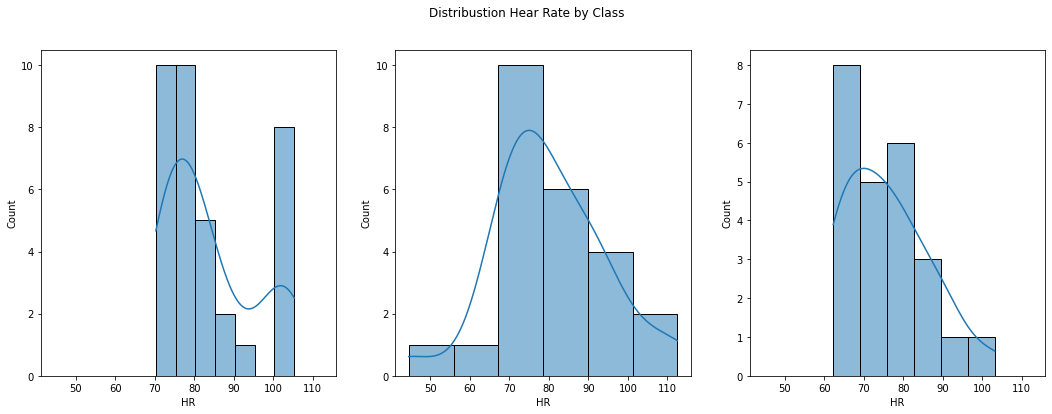

In [ ]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(18,6))
figure.suptitle('Distribustion Hear Rate by Class')
sns.histplot(df_H['HR'] , kde=True,ax=axes[0])
sns.histplot(df_M['HR'] , kde=True,ax=axes[1])
sns.histplot(df_L['HR'] , kde=True,ax=axes[2])

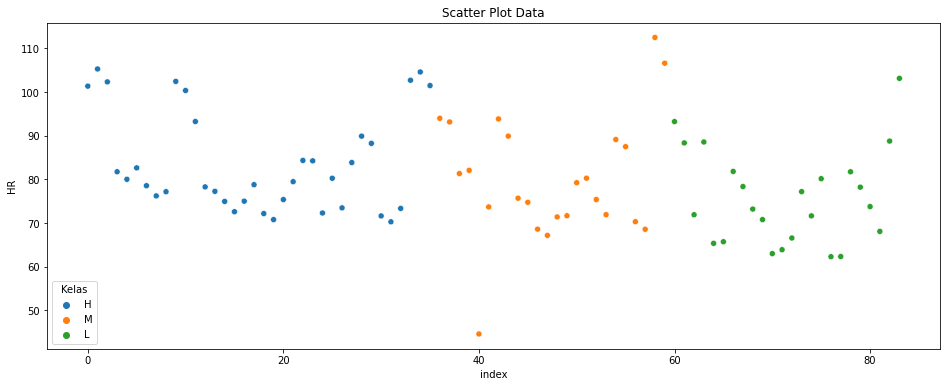

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Scatter Plot Data')
sns.scatterplot(data=df, x="index", y="HR", hue="Kelas")

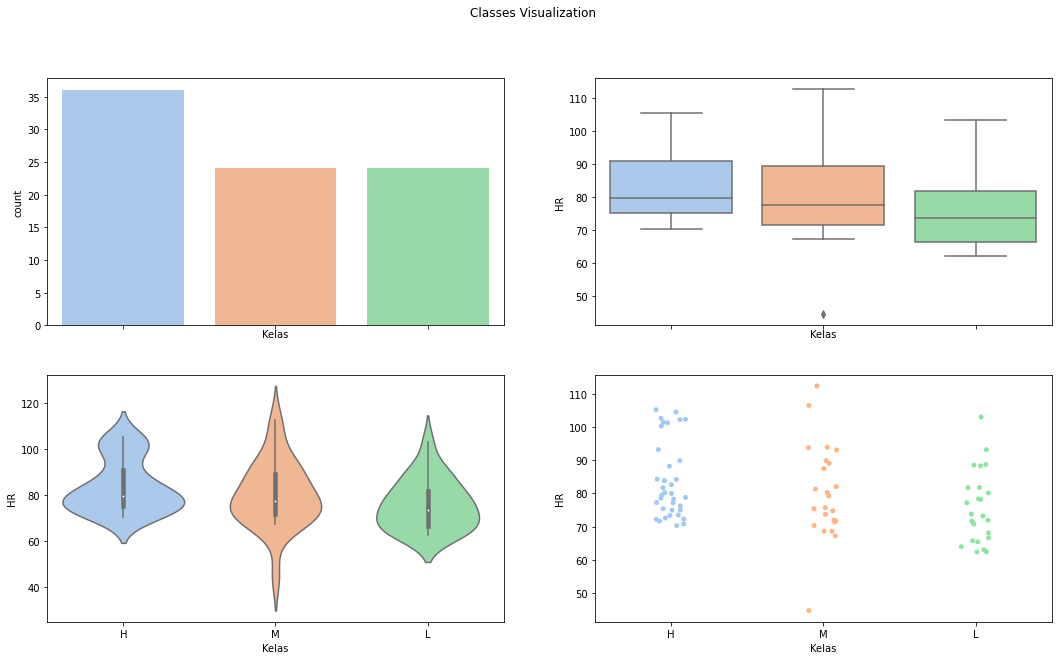

In [ ]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(18,10))
figure.suptitle('Classes Visualization')
sns.countplot(x='Kelas',data=df,palette='pastel', ax=axes[0][0])
sns.boxplot(x="Kelas", y="HR", data=df, palette='pastel', ax=axes[0][1])
sns.violinplot(x="Kelas", y="HR", data=df, palette='pastel', ax=axes[1][0])
sns.stripplot(x="Kelas", y="HR", data=df,jitter=True, palette='pastel', ax=axes[1][1])

# Classification

In [ ]:
def cleaning_column_label(cols):
    label = cols[0]
    
    if label == 'H':
        label = 2
    elif label == 'M':
        label = 1
    elif label == 'L':
        label = 0

    return label

In [ ]:
df['label'] = df[['Kelas']].apply(cleaning_column_label, axis='columns')
df

,index,Kelas,HR,label
0,0,H,101.37,2
1,1,H,105.30,2
2,2,H,102.34,2
3,3,H,81.75,2
4,4,H,80.02,2
...,...,...,...,...
79,79,L,78.22,0
80,80,L,73.77,0
81,81,L,68.08,0
82,82,L,88.78,0


In [ ]:
features = df[['HR']]
label = df['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, label, stratify=df['label'],test_size=0.25, random_state=101)

## Support Vector Machine

In [ ]:
svm_linear = SVC(gamma='auto', kernel='linear')
svm_linear.fit(x_train, y_train)
svm_linear.score(x_test, y_test)

0.42857142857142855

In [ ]:
svm_poly = SVC(gamma='auto', kernel='poly')
svm_poly.fit(x_train, y_train)
svm_poly.score(x_test, y_test)

0.42857142857142855

In [ ]:
svm_rbf = SVC(gamma='auto', kernel='rbf')
svm_rbf.fit(x_train, y_train)
svm_rbf.score(x_test, y_test)

0.47619047619047616

## K-Nearest Neighhbours

In [ ]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(x_train, y_train)
knn_3.score(x_test, y_test)

0.3333333333333333

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(x_train, y_train)
knn_5.score(x_test, y_test)

0.19047619047619047

In [ ]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(x_train, y_train)
knn_7.score(x_test, y_test)

0.3333333333333333

## Logistic Regression

In [ ]:
logistic = LogisticRegression(solver='liblinear',multi_class='auto')
logistic.fit(x_train, y_train)
logistic.score(x_test, y_test)

0.42857142857142855

## Naive bayes

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
naive_bayes.score(x_test, y_test)

0.42857142857142855

## Decistion Tree

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth =3)
decision_tree.fit(x_train, y_train)
decision_tree.score(x_test, y_test)

0.5238095238095238

## Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(x_train, y_train)
random_forest.score(x_test, y_test)

0.47619047619047616

## XGBoost

In [ ]:
xgboost = XGBClassifier()
xgboost.fit(x_train, y_train)
xgboost.score(x_test, y_test)

0.42857142857142855

# Using Heart Rate and Heart Rate Variability

In [ ]:
df

,index,Kelas,HR,label
0,0,H,101.37,2
1,1,H,105.30,2
2,2,H,102.34,2
3,3,H,81.75,2
4,4,H,80.02,2
...,...,...,...,...
79,79,L,78.22,0
80,80,L,73.77,0
81,81,L,68.08,0
82,82,L,88.78,0


In [ ]:
def impute_column_HRV(cols):
    HR = cols[0]
    
    HRV = 60 / HR

    return HRV

In [ ]:
df['HRV'] = df[['HR']].apply(impute_column_HRV, axis='columns')
df

,index,Kelas,HR,label,HRV
0,0,H,101.37,2,0.591891
1,1,H,105.30,2,0.569801
2,2,H,102.34,2,0.586281
3,3,H,81.75,2,0.733945
4,4,H,80.02,2,0.749813
...,...,...,...,...,...
79,79,L,78.22,0,0.767067
80,80,L,73.77,0,0.813339
81,81,L,68.08,0,0.881316
82,82,L,88.78,0,0.675828


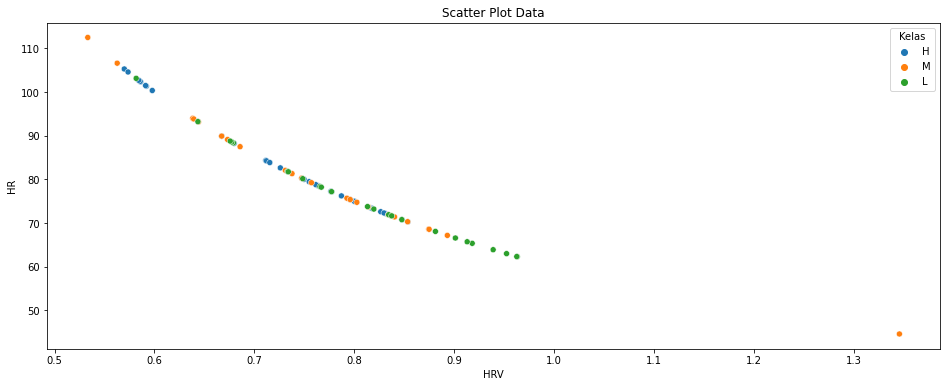

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Scatter Plot Data')
sns.scatterplot(data=df, x="HRV", y="HR", hue="Kelas")

In [ ]:
df[df['HR'] < 50]

,index,Kelas,HR,label,HRV
40,40,M,44.58,1,1.345895


In [ ]:
df = df.drop([40])
df[df['HR'] < 50]

,index,Kelas,HR,label,HRV


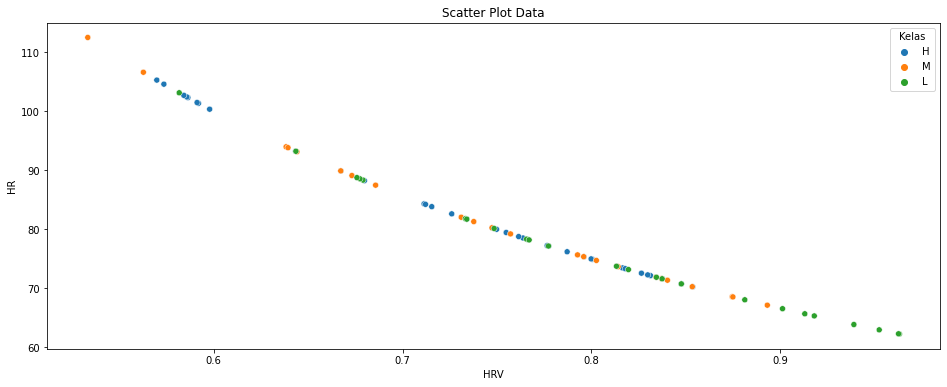

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Scatter Plot Data')
sns.scatterplot(data=df, x="HRV", y="HR", hue="Kelas")

## Feature Scaling Using Z-Score

In [ ]:
features_2 = df[['HR', 'HRV']]
label_2 = df['label']

In [ ]:
zscore_scaler = StandardScaler()
features_2_scaled_zscore = zscore_scaler.fit_transform(features_2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features_2_scaled_zscore, label_2, stratify=df['label'], test_size=0.25, random_state=101)

### Classification

#### Support vector Machine

In [ ]:
svm_linear = SVC(gamma='auto', kernel='linear')
svm_linear.fit(x_train, y_train)
svm_linear.score(x_test, y_test)

0.5238095238095238

In [ ]:
svm_poly = SVC(gamma='auto', kernel='poly')
svm_poly.fit(x_train, y_train)
svm_poly.score(x_test, y_test)

0.5238095238095238

In [ ]:
svm_rbf = SVC(gamma='auto', kernel='rbf')
svm_rbf.fit(x_train, y_train)
svm_rbf.score(x_test, y_test)

0.5238095238095238

#### K-Nearest Neighbours

In [ ]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(x_train, y_train)
knn_3.score(x_test, y_test)

0.3333333333333333

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(x_train, y_train)
knn_5.score(x_test, y_test)

0.23809523809523808

In [ ]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(x_train, y_train)
knn_7.score(x_test, y_test)

0.38095238095238093

#### Logistic Regression

In [ ]:
logistic = LogisticRegression(solver='liblinear',multi_class='auto')
logistic.fit(x_train, y_train)
logistic.score(x_test, y_test)

0.42857142857142855

#### Naive Bayes

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
naive_bayes.score(x_test, y_test)

0.42857142857142855

#### Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth =3)
decision_tree.fit(x_train, y_train)
decision_tree.score(x_test, y_test)

0.5238095238095238

#### Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(x_train, y_train)
random_forest.score(x_test, y_test)

0.38095238095238093

#### XGBoost

In [ ]:
xgboost = XGBClassifier()
xgboost.fit(x_train, y_train)
xgboost.score(x_test, y_test)

0.38095238095238093

## Feature Scaling Using Min-Max

In [ ]:
minmax_scaler = MinMaxScaler()
features_2_scaled_minmax = minmax_scaler.fit_transform(features_2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features_2_scaled_minmax, label_2, test_size=0.25, random_state=101)

### Classification

#### Support Vector Machine

In [ ]:
svm_linear = SVC(gamma='auto', kernel='linear')
svm_linear.fit(x_train, y_train)
svm_linear.score(x_test, y_test)

0.42857142857142855

In [ ]:
svm_poly = SVC(gamma='auto', kernel='poly')
svm_poly.fit(x_train, y_train)
svm_poly.score(x_test, y_test)

0.5714285714285714

In [ ]:
svm_rbf = SVC(gamma='auto', kernel='rbf')
svm_rbf.fit(x_train, y_train)
svm_rbf.score(x_test, y_test)

0.5714285714285714

#### K-Nearest Neighbours

In [ ]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(x_train, y_train)
knn_3.score(x_test, y_test)

0.3333333333333333

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(x_train, y_train)
knn_5.score(x_test, y_test)

0.38095238095238093

In [ ]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(x_train, y_train)
knn_7.score(x_test, y_test)

0.3333333333333333

#### Logistic Regression

In [ ]:
logistic = LogisticRegression(solver='liblinear',multi_class='auto')
logistic.fit(x_train, y_train)
logistic.score(x_test, y_test)

0.47619047619047616

#### Naive Bayes

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
naive_bayes.score(x_test, y_test)

0.42857142857142855

#### Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth =3)
decision_tree.fit(x_train, y_train)
decision_tree.score(x_test, y_test)

0.6190476190476191

#### Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(x_train, y_train)
random_forest.score(x_test, y_test)

0.2857142857142857

#### XGBoost

In [ ]:
xgboost = XGBClassifier()
xgboost.fit(x_train, y_train)
xgboost.score(x_test, y_test)

0.19047619047619047

# Outlier Detection

In [ ]:
df_H = df[df['Kelas'] == 'H']
df_H = df_H['HR']
df_M = df[df['Kelas'] == 'M']
df_M = df_M['HR']
df_L = df[df['Kelas'] == 'L']
df_L = df_L['HR']

## IQR (Inter Quartile Range)

In [ ]:
def IQR(df):
  data = sorted(df)
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  IQR = q3 - q1
  lower = q1 - (1.5 * IQR)
  upper = q3 + (1.5 * IQR)
  outlier =  [i for i in data if i > upper or i < lower]
  return outlier

In [ ]:
outlier = IQR(df_H)
outlier

[]

## Mean & Standard Deviation

In [ ]:
def mean_std(df):
  data = df
  mean = np.mean(data)
  std = np.std(data)
  outlier_upper = [i for i in data if i > mean + 3 * std]
  outlier_lower = [i for i in data if i < mean - 3 * std]
  outlier = outlier_lower + outlier_upper
  return outlier

In [ ]:
outlier = mean_std(df_L)
outlier

[]

## Percentile

In [ ]:
def percentile_H(df):
  data = df
  lower_percentile = np.percentile(data, 30)
  upper_percentile = np.percentile(data, 100)

  result = [i for i in data if i < upper_percentile and i > lower_percentile]
  return result

def percentile_M(df):
  data = df
  lower_percentile = np.percentile(data, 5)
  upper_percentile = np.percentile(data, 95)

  result = [i for i in data if i < upper_percentile and i > lower_percentile]
  return result

def percentile_L(df):
  data = df
  lower_percentile = np.percentile(data, 5)
  upper_percentile = np.percentile(data, 80)

  result = [i for i in data if i < upper_percentile and i > lower_percentile]
  return result

In [ ]:
result_H = percentile_H(df_H)
result_M = percentile_M(df_M)
result_L = percentile_L(df_L)

label = []

for i in range(len(result_H)):
  label.append(2)

for i in range(len(result_M)):
  label.append(1)

for i in range(len(result_L)):
  label.append(0)

data = result_H + result_M + result_L

In [ ]:
data_selection = pd.DataFrame(data, columns=['HR'])
data_selection['Label'] = label

In [ ]:
def impute_column_HRV_2(cols):
    HR = cols[0]
    
    HRV = 1500 / HR

    return HRV

In [ ]:
data_selection['HRV'] = data_selection[['HR']].apply(impute_column_HRV, axis='columns')

In [ ]:
data_selection.to_csv('/content/gdrive/MyDrive/stress level - heart rate/dataset filter.csv', index=False)

### Visualize Data

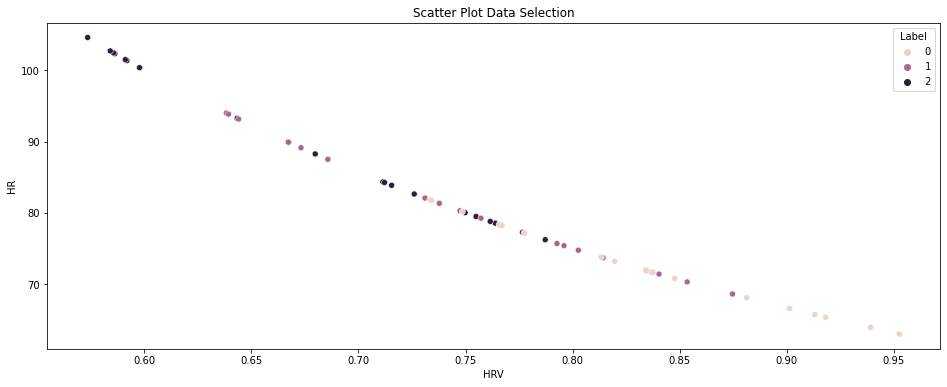

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Scatter Plot Data Selection')
sns.scatterplot(data=data_selection, x="HRV", y="HR", hue="Label")

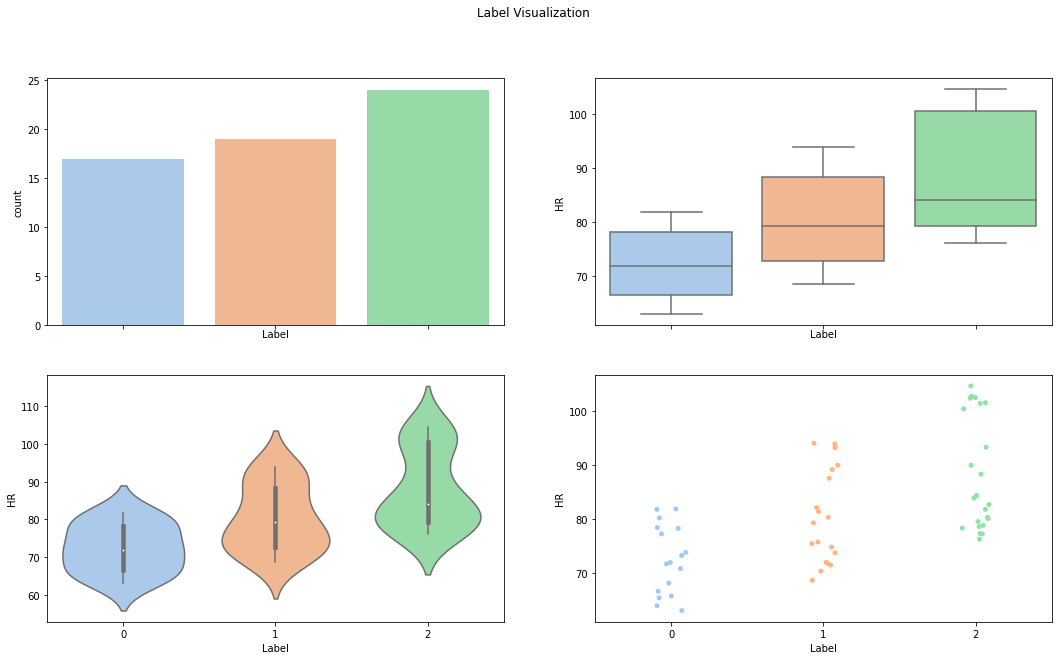

In [ ]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(18,10))
figure.suptitle('Label Visualization')
sns.countplot(x='Label',data=data_selection,palette='pastel', ax=axes[0][0])
sns.boxplot(x="Label", y="HR", data=data_selection, palette='pastel', ax=axes[0][1])
sns.violinplot(x="Label", y="HR", data=data_selection, palette='pastel', ax=axes[1][0])
sns.stripplot(x="Label", y="HR", data=data_selection,jitter=True, palette='pastel', ax=axes[1][1])

### Classification using Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
features_selection = data_selection[['HR', 'HRV']]
label_selection = data_selection['Label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features_selection, label_selection, stratify=data_selection['Label'], test_size=0.25, random_state=101)

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(x_train, y_train)
decision_tree.score(x_test, y_test)

0.7333333333333333

Text(69.0, 0.5, 'Truth')

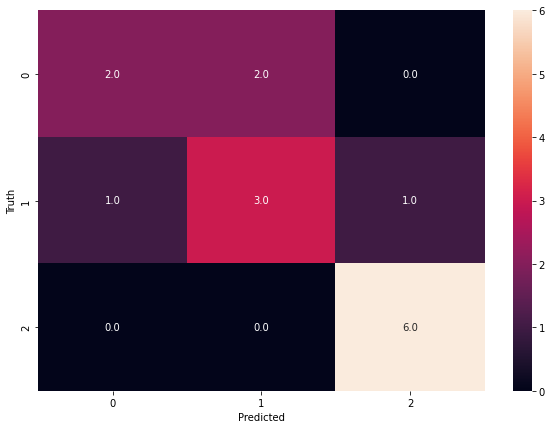

In [ ]:
y_predicted = decision_tree.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt=".1f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.60      0.60      0.60         5
           2       0.86      1.00      0.92         6

    accuracy                           0.73        15
   macro avg       0.71      0.70      0.70        15
weighted avg       0.72      0.73      0.72        15



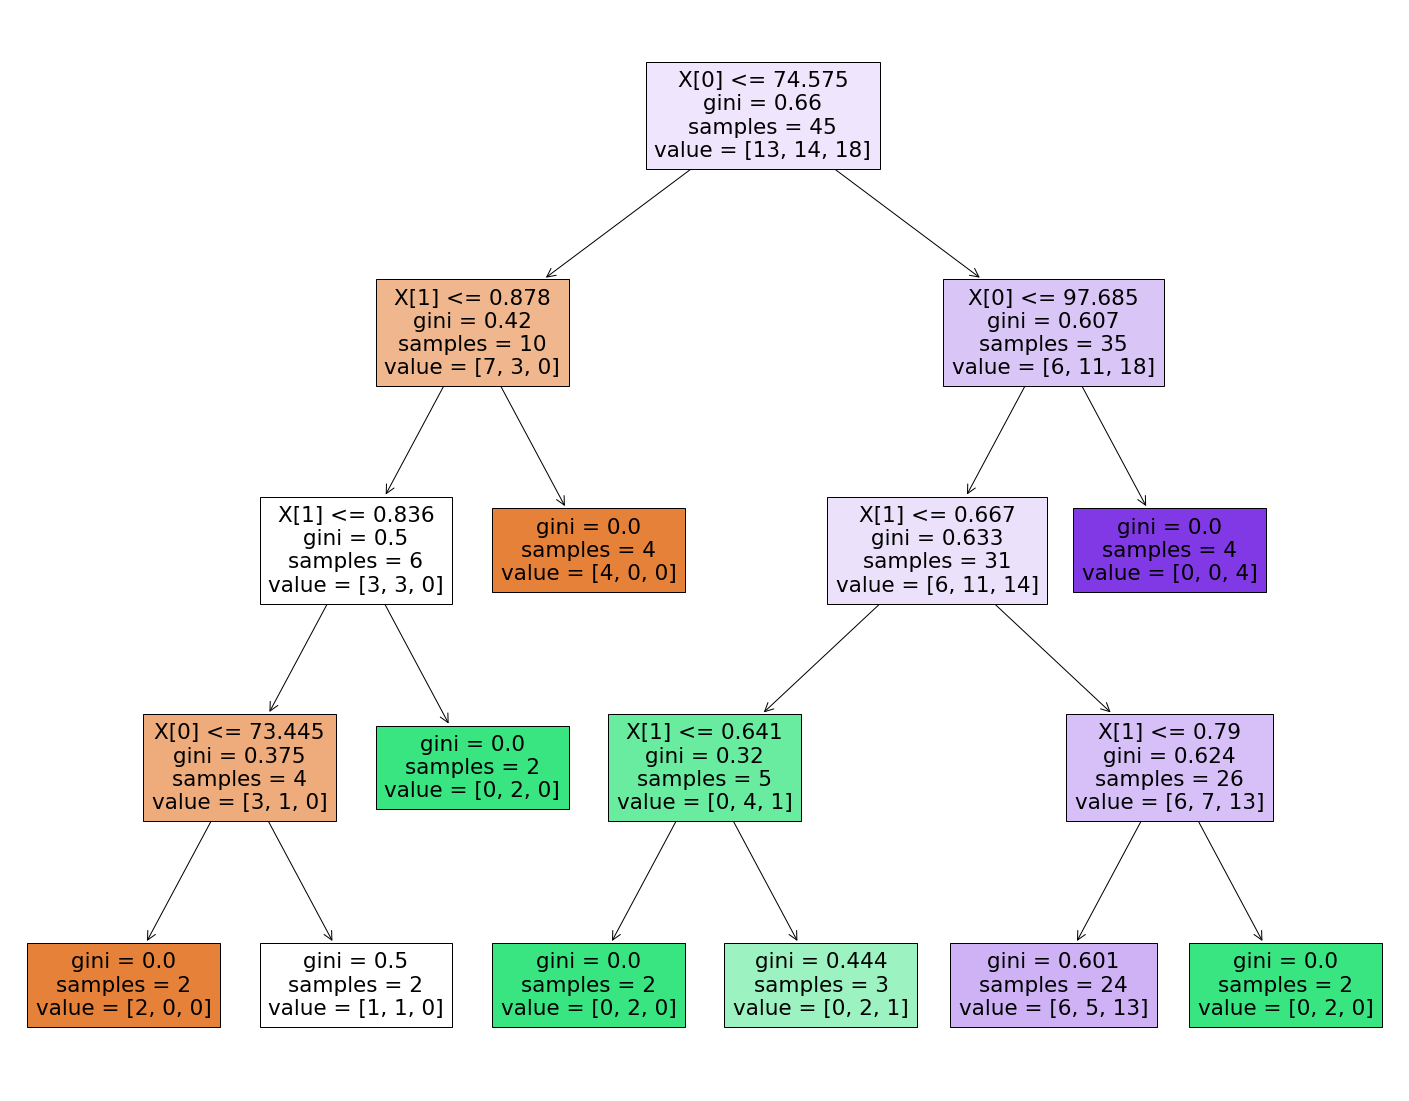

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree,
                   filled=True)

In [ ]:
print(port(decision_tree))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class DecisionTree {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        if (x[0] <= 74.57499694824219) {
                            if (x[1] <= 0.8779758512973785) {
                                if (x[1] <= 0.835831344127655) {
                                    if (x[0] <= 73.44499969482422) {
                                        return 0;
                                    }

                                    else {
                                        return 0;
                                    }
                                }

                                else {
                                    return 1;
                                }
                            }

                            else {
      

In [ ]:
y_test

50    0
32    1
49    0
4     2
39    1
44    0
54    0
9     2
3     2
42    1
15    2
23    2
34    1
8     2
41    1
Name: Label, dtype: int64

In [ ]:
y_predicted

array([0, 1, 1, 2, 0, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2])

In [ ]:
x_test.iloc[5]

HR     65.350000
HRV     0.918133
Name: 44, dtype: float64

In [ ]:
hr = 68
hrv = 60 / hr

print(hrv)

features = np.array([hr, hrv])
features = features.reshape(1,-1)

decision_tree.predict(features)

0.8823529411764706


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

### Testing Another ML Alghhoritm

In [ ]:
svm_linear = SVC(gamma='auto', kernel='linear')
svm_linear.fit(x_train, y_train)
svm_linear.score(x_test, y_test)

0.6666666666666666

In [ ]:
svm_poly = SVC(gamma='auto', kernel='poly')
svm_poly.fit(x_train, y_train)
svm_poly.score(x_test, y_test)

0.6

In [ ]:
svm_rbf = SVC(gamma='auto', kernel='rbf')
svm_rbf.fit(x_train, y_train)
svm_rbf.score(x_test, y_test)

0.6666666666666666

In [ ]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(x_train, y_train)
knn_3.score(x_test, y_test)

0.6

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(x_train, y_train)
knn_5.score(x_test, y_test)

0.6

In [ ]:
logistic = LogisticRegression(solver='liblinear',multi_class='auto')
logistic.fit(x_train, y_train)
logistic.score(x_test, y_test)

0.6666666666666666

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
naive_bayes.score(x_test, y_test)

0.5333333333333333

In [ ]:
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(x_train, y_train)
random_forest.score(x_test, y_test)

0.6

In [ ]:
xgboost = XGBClassifier()
xgboost.fit(x_train, y_train)
xgboost.score(x_test, y_test)

0.6666666666666666